In [1]:
import sys
sys.path.append('./latent-diffusion/ldm/data/')

In [2]:
import numpy as np
from ct_rsna import CTDataset
from torchvision import transforms
from matplotlib import pyplot as plt

In [3]:
np.random.seed(7)

In [4]:
train_dir = './data/ct-rsna/train'

In [5]:
ct_ds = CTDataset(data_dir=train_dir, labels_file='train_set.csv', size=256, flip_prob=0.5)

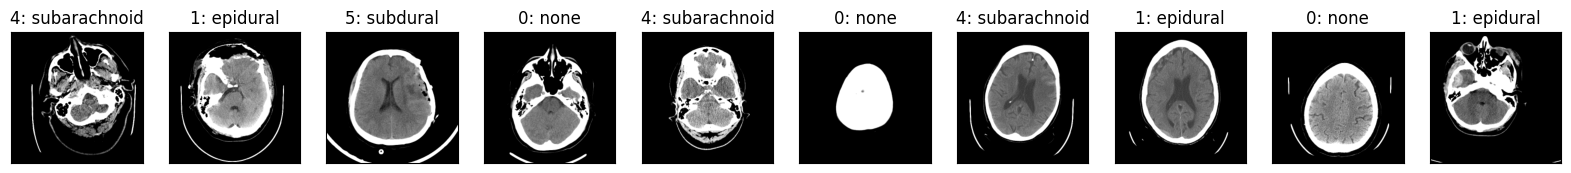

In [6]:
N = 10
plt.figure(figsize=(20, 5))
for i, idx in enumerate(np.random.choice(len(ct_ds), N)):

    data = ct_ds[idx]
    x, y, label = data['image'], data['class_label'], data['human_label']

    title = f'{int(y)}: {label}'

    plt.subplot(1, N, i+1)
    plt.imshow(x[..., 0].squeeze(), cmap='gray', vmin=-1., vmax=1.)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

plt.show()

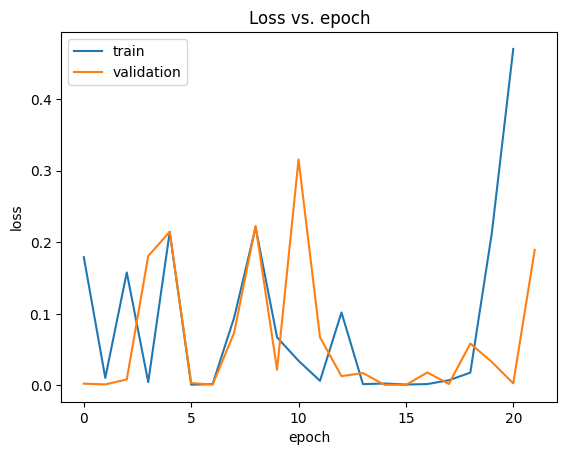

In [43]:
import pandas as pd
import os

model_train_dir = "latent-diffusion/logs/single_sample_empty_ckpt/"
metrics_file_path = os.path.join(model_train_dir, "testtube/version_1/metrics.csv")
metrics_df = pd.read_csv(metrics_file_path)
metrics_df = plot_training_metrics(model_train_dir)

epoch = metrics_df['epoch'].dropna().values

train_loss = metrics_df['train/loss_simple_epoch'].dropna().values
val_loss = metrics_df['val/loss_simple'].dropna().values

plt.figure()
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. epoch')
plt.legend()
plt.show()



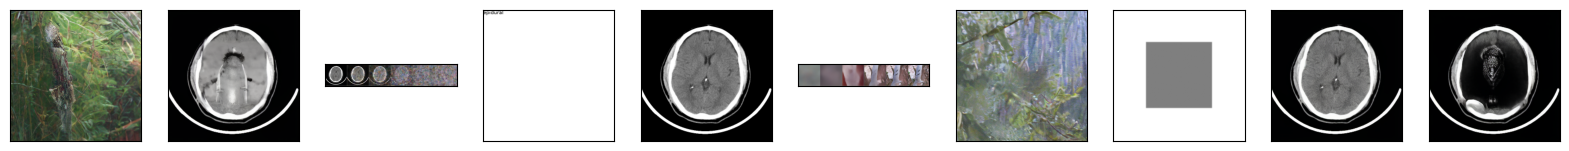

In [21]:
from matplotlib import pyplot as plt
model_train_dir = "latent-diffusion/logs/single_sample_empty_ckpt/"

images_dir = os.path.join(model_train_dir, "images/val")
N = 10
plt.figure(figsize=(20, 5))
for i, img_path in enumerate(os.listdir(images_dir)):
    img = plt.imread(os.path.join(images_dir, img_path))

    plt.subplot(1, N, i+1)
    plt.imshow(img, cmap='gray', vmin=-1., vmax=1.)

    plt.xticks([])
    plt.yticks([])
    i += 1
    if i >= N:
        break
    
               
plt.show()